In [1]:
# Package imports
import nle.dataset as nld
from nle.nethack import tty_render
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from nle.dataset import db

In [2]:
# Database path
# Define data set in separate jupyter notebook, then write it into to this notebook
nld_nao_path = "/code/nld-nao/nld-nao-unzipped"

dbfilename = "nld-nao.db"

dataset_name = "nld-nao"

db_conn = nld.db.connect(filename=dbfilename)
print(f"AltOrg Dataset has {nld.db.count_games('nld-nao', conn=db_conn)} games.")

AltOrg Dataset has 1511228 games.


In [3]:
# Players who have ascended one time
ascend_sql = """
SELECT * 
FROM games 
WHERE name IN (SELECT name FROM games WHERE death = 'ascended' GROUP BY name HAVING COUNT(*) = 1)"""

# Players who have never ascended 
non_ascend_sql = """
SELECT *
FROM games
WHERE name NOT IN (SELECT name FROM games WHERE death = 'ascended')"""

In [4]:
# Query database to obtain two dataframes 

# Ascended Players
df = pd.read_sql(ascend_sql, db_conn)  

# Non-ascended Players
df_1 = pd.read_sql(non_ascend_sql, db_conn) 

# # Close the connection
# db_conn.close()

In [6]:
# Group by player name and calculate min starttime and max endtime
time_diff = df.groupby('name').agg(min_starttime=('starttime', 'min'), max_endtime=('endtime', 'max'))

# Calculate the difference
time_diff['time_difference'] = time_diff['max_endtime'] - time_diff['min_starttime']

# print(time_diff.sort_values(by='time_difference', ascending=False))


# Merge the original DataFrame with the time difference DataFrame
df = pd.merge(df, time_diff, on='name')

# Group by player name and select the first 500 unique players
first_ten_players = df['name'].unique()[:500]
# Filter the original DataFrame to include only the first ten players
ascended_df = df[df['name'].isin(first_ten_players)]

ascended_df = ascended_df.sort_values(by=['name','starttime'])

# Drop the column
# ascended_df = ascended_df.drop('min_starttime_x', axis=1)
# ascended_df = ascended_df.drop('max_endtime_x', axis=1)
# ascended_df = ascended_df.drop('min_starttime_y', axis=1)
# ascended_df = ascended_df.drop('max_endtime_y', axis=1)
# ascended_df = ascended_df.drop('time_difference_x', axis=1)
# ascended_df = ascended_df.drop('time_difference_y', axis=1)
ascended_df

,gameid,version,points,deathdnum,deathlev,maxlvl,hp,maxhp,deaths,deathdate,...,achieve,realtime,starttime,endtime,gender0,align0,flags,min_starttime,max_endtime,time_difference
48354,3520378,3.4.3,0,0,1,1,0,10,1,20080322,...,0x0,30,1206144424,1206144460,Fem,Neu,-1,1206144424,1509394897,303250473
48355,3520380,3.4.3,0,0,1,1,-1,11,1,20080322,...,0x0,125,1206144463,1206144590,Mal,Cha,-1,1206144424,1509394897,303250473
48391,3520795,3.4.3,161,0,3,3,15,15,0,20080322,...,0x0,106,1206223951,1206224061,Fem,Cha,-1,1206144424,1509394897,303250473
48419,3521208,3.4.3,250,2,6,6,-17,13,1,20080323,...,0x0,632,1206271297,1206300939,Mal,Cha,-1,1206144424,1509394897,303250473
48420,3521210,3.4.3,3,7,-5,1,16,16,0,20080323,...,0xe0,46,1206300990,1206301044,Fem,Neu,-1,1206144424,1509394897,303250473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143451,6536031,3.4.3,2912,2,4,4,-6,37,1,20171028,...,0x0,698,1509213708,1509214406,Mal,Cha,0x0,1241443423,1586716752,345273329
143458,6536204,3.4.3,474,0,2,2,-4,27,1,20171030,...,0x0,393,1509361268,1509361663,Mal,Cha,0x0,1241443423,1586716752,345273329
143459,6536205,3.4.3,93,0,1,1,0,11,1,20171030,...,0x0,75,1509361666,1509361741,Mal,Cha,0x0,1241443423,1586716752,345273329
43810,2782906,3.6.0,90,0,1,1,8,11,0,20171102,...,0x0,200,1509615957,1509616158,Mal,Cha,0x4,1241443423,1586716752,345273329


In [7]:
# Drop the column
ascended_df = ascended_df.drop('min_starttime_x', axis=1)
ascended_df = ascended_df.drop('max_endtime_x', axis=1)
ascended_df = ascended_df.drop('min_starttime_y', axis=1)
ascended_df = ascended_df.drop('max_endtime_y', axis=1)
ascended_df = ascended_df.drop('time_difference_x', axis=1)
ascended_df = ascended_df.drop('time_difference_y', axis=1)

KeyError: "['min_starttime_x'] not found in axis"

In [8]:
ascended_df

,gameid,version,points,deathdnum,deathlev,maxlvl,hp,maxhp,deaths,deathdate,...,achieve,realtime,starttime,endtime,gender0,align0,flags,min_starttime,max_endtime,time_difference
48354,3520378,3.4.3,0,0,1,1,0,10,1,20080322,...,0x0,30,1206144424,1206144460,Fem,Neu,-1,1206144424,1509394897,303250473
48355,3520380,3.4.3,0,0,1,1,-1,11,1,20080322,...,0x0,125,1206144463,1206144590,Mal,Cha,-1,1206144424,1509394897,303250473
48391,3520795,3.4.3,161,0,3,3,15,15,0,20080322,...,0x0,106,1206223951,1206224061,Fem,Cha,-1,1206144424,1509394897,303250473
48419,3521208,3.4.3,250,2,6,6,-17,13,1,20080323,...,0x0,632,1206271297,1206300939,Mal,Cha,-1,1206144424,1509394897,303250473
48420,3521210,3.4.3,3,7,-5,1,16,16,0,20080323,...,0xe0,46,1206300990,1206301044,Fem,Neu,-1,1206144424,1509394897,303250473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143451,6536031,3.4.3,2912,2,4,4,-6,37,1,20171028,...,0x0,698,1509213708,1509214406,Mal,Cha,0x0,1241443423,1586716752,345273329
143458,6536204,3.4.3,474,0,2,2,-4,27,1,20171030,...,0x0,393,1509361268,1509361663,Mal,Cha,0x0,1241443423,1586716752,345273329
143459,6536205,3.4.3,93,0,1,1,0,11,1,20171030,...,0x0,75,1509361666,1509361741,Mal,Cha,0x0,1241443423,1586716752,345273329
43810,2782906,3.6.0,90,0,1,1,8,11,0,20171102,...,0x0,200,1509615957,1509616158,Mal,Cha,0x4,1241443423,1586716752,345273329


In [31]:
# Group by player name and calculate min starttime and max endtime
time_diff = df_1.groupby('name').agg(min_starttime=('starttime', 'min'), max_endtime=('endtime', 'max'))

# Calculate the difference
time_diff['time_difference'] = time_diff['max_endtime'] - time_diff['min_starttime']

df_1 = pd.merge(df_1, time_diff, on='name')

# Group by player name and select the first 25 unique players
first_ten_players = df_1['name'].unique()[:550]
# Filter the original DataFrame to include only the first ten players
non_ascended_df = df_1[df_1['name'].isin(first_ten_players)]

non_ascended_df = non_ascended_df.drop('min_starttime_x', axis=1)
non_ascended_df = non_ascended_df.drop('max_endtime_x', axis=1)

In [16]:
# Merge Data frames for Model Construction 

# Merge ascended and non-ascended players
# Merge the DataFrames on common columns (e.g., 'name' and 'starttime')
data = pd.merge(ascended_df, non_ascended_df, how = 'outer')

data = data.sort_values(by=['name','starttime'])


# Convert Unix time columns to human-readable datetime
data['starttime'] = pd.to_datetime(data['starttime'], unit='s')
data['endtime'] = pd.to_datetime(data['endtime'], unit='s')
df = df.sort_values(by=['name', 'starttime'], ascending=[True, True])
# 
# data['time_difference'] = pd.to_datetime(data['time_difference'], unit='s')
# 
# # Group by player name and calculate min starttime and max endtime
# time_diff = data.groupby('name').agg(min_starttime=('starttime', 'min'), max_endtime=('endtime', 'max')
# )
# 
# # Calculate the difference
# time_diff['time_difference'] = time_diff['max_endtime'] - time_diff['min_starttime']
# 
# # Merge the original DataFrame with the time difference DataFrame
# data = pd.merge(data, time_diff, on='name')
# # Delete the 'age' column
# data = data.drop('time_difference_x', axis=1)
# data = data.drop('min_starttime', axis=1)
# data = data.drop('max_endtime', axis=1)
# 
# data

NameError: name 'non_ascended_df' is not defined

In [ ]:
df = df.sort_values(by=['name', 'starttime'], ascending=[True, True])
df

In [9]:
# Define a function to filter out rows after the first "ascended" death for each player
def filter_after_ascension(group):
    if 'ascended' in group['death'].values:
        # Find the index of the first "ascended" death
        first_ascended_index = group[group['death'] == 'ascended'].index[0]
        # Filter rows up to and including the first "ascended" death
        return group.loc[:first_ascended_index]
    else:
        # If "ascended" does not exist, return the entire group
        return group

# Apply the function to each group of players
filtered_df = df.groupby('name', group_keys=False).apply(filter_after_ascension)

filtered_df

/tmp/ipykernel_14269/4291055022.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filtered_df = df.groupby('name', group_keys=False).apply(filter_after_ascension)


,gameid,version,points,deathdnum,deathlev,maxlvl,hp,maxhp,deaths,deathdate,...,achieve,realtime,starttime,endtime,gender0,align0,flags,min_starttime,max_endtime,time_difference
20878,2237469,3.6.0,106,0,2,2,0,10,1,20151208,...,0x0,59,1449569316,1449569361,Mal,Neu,0x4,1206144424,1509394897,303250473
43763,2780724,3.6.0,37,0,1,1,-1,10,1,20171030,...,0x0,100,1464595898,1509394897,Fem,Neu,0x4,1206144424,1509394897,303250473
48354,3520378,3.4.3,0,0,1,1,0,10,1,20080322,...,0x0,30,1206144424,1206144460,Fem,Neu,-1,1206144424,1509394897,303250473
48355,3520380,3.4.3,0,0,1,1,-1,11,1,20080322,...,0x0,125,1206144463,1206144590,Mal,Cha,-1,1206144424,1509394897,303250473
48391,3520795,3.4.3,161,0,3,3,15,15,0,20080322,...,0x0,106,1206223951,1206224061,Fem,Cha,-1,1206144424,1509394897,303250473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74834,3896487,3.4.3,14931,0,5,8,98,98,1,20091025,...,0x0,6791,1256474950,1256481755,Fem,Law,-1,1241443423,1586716752,345273329
74835,3896497,3.4.3,122,0,2,2,-2,18,1,20091025,...,0x0,184,1256483412,1256483600,Fem,Law,-1,1241443423,1586716752,345273329
74836,3896505,3.4.3,1316,0,5,5,0,57,1,20091025,...,0x0,352,1256483703,1256484057,Fem,Law,-1,1241443423,1586716752,345273329
74837,3896528,3.4.3,2553,0,5,5,-5,61,1,20091025,...,0x0,1150,1256486258,1256487409,Fem,Law,-1,1241443423,1586716752,345273329


In [10]:
games_played = filtered_df.groupby('name').size().reset_index(name='games_played')

# Aggregate according to metrics
player_metrics = filtered_df.groupby('name').agg(
    games_to_ascend=('name', 'size'),  
    avg_points=('points', 'mean'),     
    max_level=('maxlvl', 'max'),       
    turns_sum=('turns', 'sum'),        
    points_std=('points', 'std'), 
    points_max = ('points', 'max'), 
    turns_std = ('turns', 'std'),
    lvl_std = ('maxlvl', 'std'), 
    # New Features - Clustering and Rolling Window Features    
).reset_index()

player_metrics = pd.merge(player_metrics, games_played, on='name')

player_metrics

,name,games_to_ascend,avg_points,max_level,turns_sum,points_std,points_max,turns_std,lvl_std,games_played
0,Player0,8,7.025000e+01,6,606,93.792705,250,112.138626,1.772811,8
1,Player10016,40,1.093039e+05,49,202066,643609.357448,4076842,12502.712689,7.846239,40
2,Player10023,516,1.042550e+04,49,1038643,146240.863958,3275828,3463.541596,3.560724,516
3,Player10087,71,6.137804e+04,53,345123,377674.511028,2951572,10005.730883,7.981619,71
4,Player10090,61,6.816025e+04,50,336834,480019.620265,3752861,9920.931543,6.528416,61
...,...,...,...,...,...,...,...,...,...,...
1537,Player9910,103,4.712476e+04,51,461418,422301.098959,4288588,9432.624412,5.173554,103
1538,Player9929,18,1.554152e+05,47,84269,548292.022064,2310340,7470.335288,12.537004,18
1539,Player9967,1,3.613434e+06,49,79069,NaN,3613434,NaN,NaN,1
1540,Player998,1,6.267368e+06,52,81958,NaN,6267368,NaN,NaN,1


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Define Dataset, to be converted to dataframe for classification 
pairwise_data = []

# For loop for pairwise comparison
for i, player_a in player_metrics.iterrows(): # iterates over each row in the player metrics dataframe (A)
    for j, player_b in player_metrics.iterrows(): # iterates over each row in the player metrics dataframe (B)
        if i < j:  # Distinguished between A and B loops
            # Features dictionary stores player differences 
            features = {
                'games_to_ascend_diff': abs(player_a['games_to_ascend'] - player_b['games_to_ascend']),
                'avg_points_diff': abs(player_a['avg_points'] - player_b['avg_points']),
                'maxlvl_diff': abs(player_a['max_level'] - player_b['max_level']),
                'turns_diff': abs(player_a['turns_sum'] - player_b['turns_sum']),
                'points_std_diff': abs(player_a['points_std'] - player_b['points_std']), 
                'points_max_diff': abs(player_a['points_max'] - player_b['points_max']),
                'turns_std_diff': abs(player_a['turns_std'] - player_b['turns_std']),
                'lvl_std_diff': abs(player_a['lvl_std'] - player_b['lvl_std']),
                
                # New Features
                'points_per_turn_diff': abs((player_a['points_max'] / player_a['turns_sum']) - (player_b['points_max'] / player_b['turns_sum'])),
                'normalized_points_diff': abs((player_a['points_max'] - player_b['points_max']) / max(player_a['points_max'], player_b['points_max'])),
                'points_volatility_diff': abs((player_a['points_std'] / player_a['avg_points']) - (player_b['points_std'] / player_b['avg_points'])),
                'games_played_diff': abs(player_a['games_to_ascend'] - player_b['games_to_ascend'])
            }

            # Define Target Variable to encode as binary classification problem 
            target = 1 if player_a['games_to_ascend'] < player_b['games_to_ascend'] else 0

            # Unpack features dictionary and target, then added to pairwise data list
            pairwise_data.append({**features, 'target': target})

# Convert Pairwise data list to dataframe 
pairwise_df = pd.DataFrame(pairwise_data)

# Train/Test Split 
X = pairwise_df.drop(columns=['target'])
y = pairwise_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

pairwise_df

Model Accuracy: 0.7141


,games_to_ascend_diff,avg_points_diff,maxlvl_diff,turns_diff,points_std_diff,points_max_diff,turns_std_diff,lvl_std_diff,points_per_turn_diff,normalized_points_diff,points_volatility_diff,games_played_diff,target
0,32,1.092336e+05,43,201460,643515.564744,4076592,12390.574063,6.073428,19.763253,0.999939,4.553130,32,1
1,508,1.035525e+04,43,1038037,146147.071253,3275578,3351.402970,1.787913,2.741409,0.999924,12.692100,508,1
2,63,6.130779e+04,47,344517,377580.718324,2951322,9893.592257,6.208808,8.139691,0.999915,4.818124,63,1
3,53,6.809000e+04,44,336228,479925.827560,3752611,9808.792917,4.755606,10.729033,0.999933,5.707389,53,1
4,66,6.148426e+04,45,197683,502113.620754,4322216,7983.532678,4.362405,21.386278,0.999942,6.823615,66,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188106,17,6.111953e+06,5,2311,NaN,3957028,NaN,NaN,49.054235,0.631370,NaN,17,0
1188107,376,1.355010e+05,1,1075724,318385.937912,2166564,1946.535366,8.752295,23.556827,0.483942,8.016957,376,1
1188108,0,2.653934e+06,3,2889,NaN,2653934,NaN,NaN,30.770729,0.423453,NaN,0,0
1188109,393,3.593520e+06,1,1080924,NaN,863470,NaN,NaN,41.840333,0.192872,NaN,393,1


In [12]:

# Create the 'games_played' feature
filtered_df['games_played'] = filtered_df.groupby('name').cumcount() + 1

filtered_df

,gameid,version,points,deathdnum,deathlev,maxlvl,hp,maxhp,deaths,deathdate,...,realtime,starttime,endtime,gender0,align0,flags,min_starttime,max_endtime,time_difference,games_played
20878,2237469,3.6.0,106,0,2,2,0,10,1,20151208,...,59,1449569316,1449569361,Mal,Neu,0x4,1206144424,1509394897,303250473,1
43763,2780724,3.6.0,37,0,1,1,-1,10,1,20171030,...,100,1464595898,1509394897,Fem,Neu,0x4,1206144424,1509394897,303250473,2
48354,3520378,3.4.3,0,0,1,1,0,10,1,20080322,...,30,1206144424,1206144460,Fem,Neu,-1,1206144424,1509394897,303250473,3
48355,3520380,3.4.3,0,0,1,1,-1,11,1,20080322,...,125,1206144463,1206144590,Mal,Cha,-1,1206144424,1509394897,303250473,4
48391,3520795,3.4.3,161,0,3,3,15,15,0,20080322,...,106,1206223951,1206224061,Fem,Cha,-1,1206144424,1509394897,303250473,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74834,3896487,3.4.3,14931,0,5,8,98,98,1,20091025,...,6791,1256474950,1256481755,Fem,Law,-1,1241443423,1586716752,345273329,390
74835,3896497,3.4.3,122,0,2,2,-2,18,1,20091025,...,184,1256483412,1256483600,Fem,Law,-1,1241443423,1586716752,345273329,391
74836,3896505,3.4.3,1316,0,5,5,0,57,1,20091025,...,352,1256483703,1256484057,Fem,Law,-1,1241443423,1586716752,345273329,392
74837,3896528,3.4.3,2553,0,5,5,-5,61,1,20091025,...,1150,1256486258,1256487409,Fem,Law,-1,1241443423,1586716752,345273329,393


In [13]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Class Balance
print(pairwise_df['target'].value_counts())

# # 5-Fold Cross-Validation
# cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
# 
# print(f"Cross-Validation Scores: {cv_scores}")
# print(f"Mean Cross-Validation Accuracy: {np.mean(cv_scores):.4f}")

# Feature Importance 
feature_importance = model.feature_importances_
features = X.columns
for feature, importance in zip(features, feature_importance):
    print(f"Feature: {feature}, Importance: {importance:.4f}")

target
0    694035
1    494076
Name: count, dtype: int64
Feature: games_to_ascend_diff, Importance: 0.0780
Feature: avg_points_diff, Importance: 0.1143
Feature: maxlvl_diff, Importance: 0.0388
Feature: turns_diff, Importance: 0.1140
Feature: points_std_diff, Importance: 0.0679
Feature: points_max_diff, Importance: 0.0973
Feature: turns_std_diff, Importance: 0.0700
Feature: lvl_std_diff, Importance: 0.0703
Feature: points_per_turn_diff, Importance: 0.1032
Feature: normalized_points_diff, Importance: 0.0955
Feature: points_volatility_diff, Importance: 0.0748
Feature: games_played_diff, Importance: 0.0759


In [14]:
# Define 'persistence' as a player with more than 50 games 
player_metrics['persist'] = np.where(player_metrics['games_played'] > 50, 1, 0)

# Select features for the model
features = player_metrics.drop(columns=['persist', 'name', 'games_played', 'games_to_ascend'])
X = features  
y = player_metrics['persist'] 

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Model Accuracy: 0.97
Confusion Matrix:
[[210   4]
 [  6  89]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       214
           1       0.96      0.94      0.95        95

    accuracy                           0.97       309
   macro avg       0.96      0.96      0.96       309
weighted avg       0.97      0.97      0.97       309



In [45]:


# Define window size
window_size = 3
window_features = pd.DataFrame()

# Rolling features for each player
for name, group in filtered_df.groupby('name'):
    # Rolling Mean Features
    group['rolling_mean_points'] = group['points'].rolling(window=window_size, min_periods=1).mean()
    group['rolling_mean_turns'] = group['turns'].rolling(window=window_size, min_periods=1).mean()
    group['rolling_mean_maxlvl'] = group['maxlvl'].rolling(window=window_size, min_periods=1).mean()

    # Rolling Standard Deviation Features
    group['rolling_std_points'] = group['points'].rolling(window=window_size, min_periods=1).std().fillna(0)
    group['rolling_std_turns'] = group['turns'].rolling(window=window_size, min_periods=1).std().fillna(0)
    group['rolling_std_maxlvl'] = group['maxlvl'].rolling(window=window_size, min_periods=1).std().fillna(0)

    # Cumulative Sum Features
    group['cumulative_sum_points'] = group['points'].cumsum()
    group['cumulative_sum_turns'] = group['turns'].cumsum()
    group['cumulative_sum_maxlvl'] = group['maxlvl'].cumsum()

    # Expanding Mean Features
    group['expanding_mean_points'] = group['points'].expanding().mean()
    group['expanding_mean_turns'] = group['turns'].expanding().mean()
    group['expanding_mean_maxlvl'] = group['maxlvl'].expanding().mean()

    # Append the group with new features to the window_features DataFrame
    window_features = pd.concat([window_features, group])

# Reset index if needed
window_features.reset_index(drop=True, inplace=True)

# Display the updated DataFrame with window features
print(window_features.head())

    gameid version  points  deathdnum  deathlev  maxlvl  hp  maxhp  deaths  \
0  2237469   3.6.0     106          0         2       2   0     10       1   
1  2780724   3.6.0      37          0         1       1  -1     10       1   
2  3520378   3.4.3       0          0         1       1   0     10       1   
3  3520380   3.4.3       0          0         1       1  -1     11       1   
4  3520795   3.4.3     161          0         3       3  15     15       0   

   deathdate  ...  rolling_mean_maxlvl  rolling_std_points rolling_std_turns  \
0   20151208  ...             2.000000            0.000000          0.000000   
1   20171030  ...             1.500000           48.790368        103.237590   
2   20080322  ...             1.333333           53.799009         81.051424   
3   20080322  ...             1.000000           21.361960         91.920255   
4   20080322  ...             1.666667           92.953393        161.298894   

  rolling_std_maxlvl cumulative_sum_points cumulat

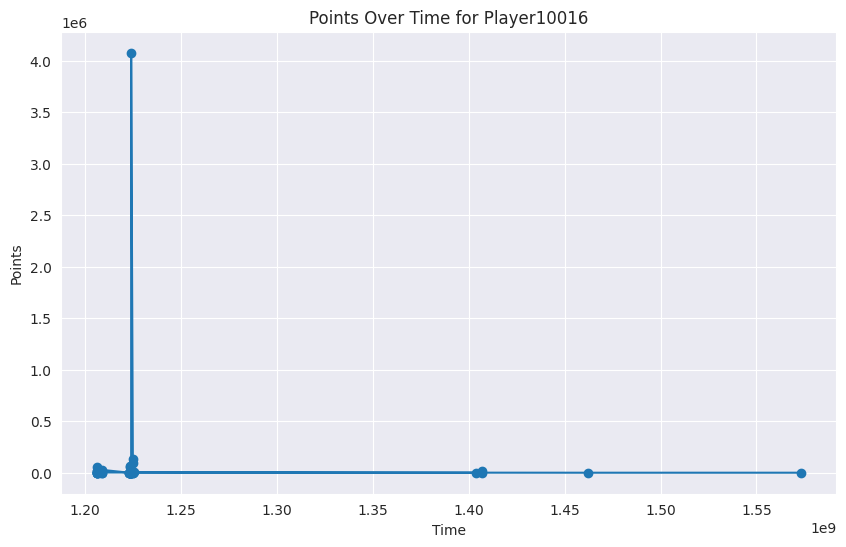

In [18]:
# Line plot for each player showing points over time
def plot_line(df, player_name, column):
    player_data = df[df['name'] == player_name]
    plt.figure(figsize=(10, 6))
    plt.plot(player_data['starttime'], player_data[column], marker='o', linestyle='-')
    plt.title(f'{column.capitalize()} Over Time for {player_name}')
    plt.xlabel('Time')
    plt.ylabel(column.capitalize())
    plt.show()

plot_line(df, 'Player10016', 'points')  # Example

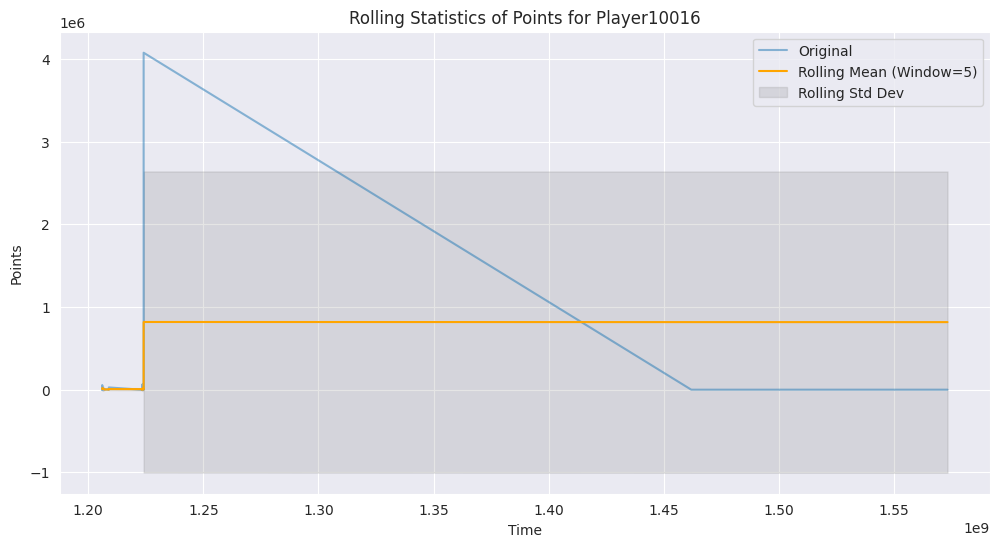

In [19]:
def plot_rolling_stats(df, player_name, column, window_size=3):
    player_data = df[df['name'] == player_name].sort_values('starttime')
    rolling_mean = player_data[column].rolling(window=window_size).mean()
    rolling_std = player_data[column].rolling(window=window_size).std()

    plt.figure(figsize=(12, 6))
    plt.plot(player_data['starttime'], player_data[column], label='Original', alpha=0.5)
    plt.plot(player_data['starttime'], rolling_mean, label=f'Rolling Mean (Window={window_size})', color='orange')
    plt.fill_between(player_data['starttime'], rolling_mean - rolling_std, rolling_mean + rolling_std, color='gray', alpha=0.2, label='Rolling Std Dev')
    plt.title(f'Rolling Statistics of {column.capitalize()} for {player_name}')
    plt.xlabel('Time')
    plt.ylabel(column.capitalize())
    plt.legend()
    plt.show()

plot_rolling_stats(filtered_df, 'Player10016', 'points', window_size=5)

ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 30 must be < 20.

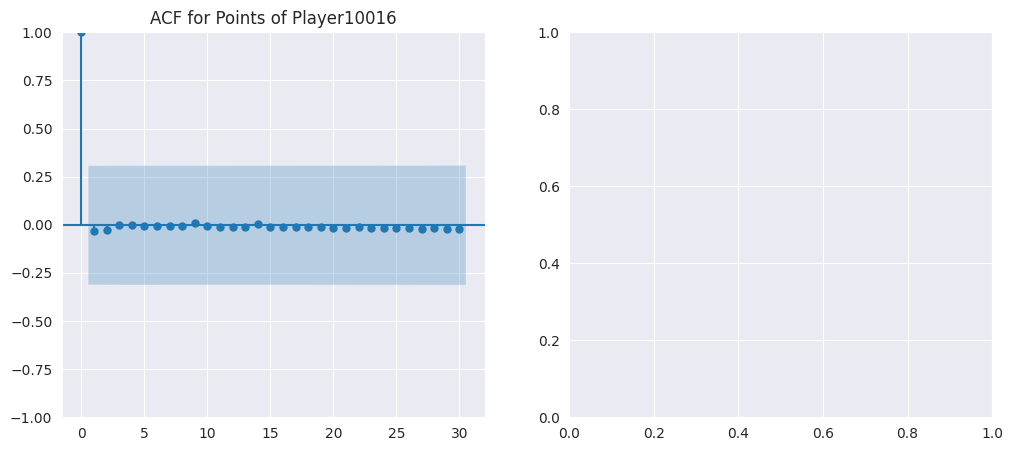

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plot
def plot_acf_pacf(df, player_name, column, lags=30):
    player_data = df[df['name'] == player_name].sort_values('starttime')
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    plot_acf(player_data[column], lags=lags, ax=plt.gca())
    plt.title(f'ACF for {column.capitalize()} of {player_name}')

    plt.subplot(122)
    plot_pacf(player_data[column], lags=lags, ax=plt.gca())
    plt.title(f'PACF for {column.capitalize()} of {player_name}')
    plt.tight_layout()
    plt.show()

plot_acf_pacf(filtered_df, 'Player10016', 'points')
